In [1]:
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
# データが保存されているフォルダのパスを指定
folder_path = R'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911/'

In [3]:
file_pattern = '*.csv'
files = glob.glob(f'{folder_path}/{file_pattern}')
print(files)

['C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM10.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM11.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM12.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM13.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM14.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM15.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM17.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM4.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM5.csv', 'C:/Users/sukegawa/Desktop/study/datasets/m5data/240911\\device-monitor-240911-111556-COM7.csv', 'C:/Users/sukegawa/Des

In [4]:
# 使用したいCOM番号を指定
target_com_nums = ["2", "3", "4", "5", "6", "7", "8", "9"]

In [5]:
# データフレームのリストを作成
data_frames = []
for file in files:
    df = pd.read_csv(file)
    # ファイル名からCOM番号を抽出
    com_num = os.path.splitext(os.path.basename(file))[0].split('-COM')[-1]
    if com_num in target_com_nums:
        # 重複を削除し、最初に取得したデータを残す
        df = df.groupby(['date', 'time', 'x', 'y']).first().reset_index()
        # "RSSI"の列名を""RSSI<COM番号>に変更"
        df = df.rename(columns={"RSSI": f"RSSI{com_num}"})
        data_frames.append(df)
print(data_frames)

[      date          time  x  y  RSSI4
0     9-11  11:06:56.211  0  0    -63
1     9-11  11:06:56.734  0  0    -71
2     9-11  11:06:57.250  0  0    -63
3     9-11  11:06:57.768  0  0    -71
4     9-11  11:06:58.285  0  0    -63
...    ...           ... .. ..    ...
1542  9-11  11:22:55.642  8  2    -69
1543  9-11  11:22:56.153  8  2    -78
1544  9-11  11:22:56.663  8  2    -70
1545  9-11  11:22:57.173  8  2    -95
1546  9-11  11:22:59.770  8  2    -63

[1547 rows x 5 columns],       date          time  x  y  RSSI5
0     9-11  11:06:56.211  0  0    -60
1     9-11  11:06:56.734  0  0    -60
2     9-11  11:06:57.250  0  0    -64
3     9-11  11:06:57.768  0  0    -60
4     9-11  11:06:58.285  0  0    -62
...    ...           ... .. ..    ...
1541  9-11  11:22:55.642  8  2    -71
1542  9-11  11:22:56.153  8  2    -74
1543  9-11  11:22:56.663  8  2    -72
1544  9-11  11:22:57.173  8  2    -76
1545  9-11  11:23:00.288  8  2    -68

[1546 rows x 5 columns],       date          time  x  y  RSS

In [6]:
# 最初のデータフレームを指定
combined_df = data_frames[0]

# 送信時刻、座標が同じm5stackのデータを横に結合
for df in data_frames[1:]:
    combined_df = pd.merge(combined_df, df, on=["date", "time", "x", "y"], how="outer")
print(combined_df)

      date          time  x  y  RSSI4  RSSI5  RSSI7  RSSI8  RSSI2  RSSI3  \
0     9-11  11:06:56.211  0  0  -63.0  -60.0  -66.0  -84.0  -58.0  -62.0   
1     9-11  11:06:56.734  0  0  -71.0  -60.0  -64.0  -64.0  -63.0  -57.0   
2     9-11  11:06:57.250  0  0  -63.0  -64.0  -62.0  -85.0  -58.0  -62.0   
3     9-11  11:06:57.768  0  0  -71.0  -60.0  -66.0  -65.0  -63.0  -57.0   
4     9-11  11:06:58.285  0  0  -63.0  -62.0  -66.0  -77.0  -58.0  -61.0   
...    ...           ... .. ..    ...    ...    ...    ...    ...    ...   
1554  9-11  11:19:29.684  7  0    NaN  -67.0  -62.0  -51.0  -71.0  -65.0   
1555  9-11  11:20:42.115  7  2    NaN  -76.0  -57.0  -66.0  -69.0  -67.0   
1556  9-11  11:22:20.139  8  1    NaN  -74.0  -53.0  -56.0  -66.0  -63.0   
1557  9-11  11:23:00.288  8  2    NaN  -68.0    NaN    NaN    NaN    NaN   
1558  9-11  11:15:46.821  4  2    NaN    NaN  -55.0  -66.0  -72.0  -71.0   

      RSSI6  RSSI9  
0     -71.0  -68.0  
1     -78.0  -68.0  
2     -71.0  -68.0  
3  

In [7]:
# 列名を並び替える
columns_order = ['date', 'time', 'x', 'y'] + [f"RSSI{num}" for num in target_com_nums]
combined_df = combined_df[columns_order]
print(combined_df)

      date          time  x  y  RSSI2  RSSI3  RSSI4  RSSI5  RSSI6  RSSI7  \
0     9-11  11:06:56.211  0  0  -58.0  -62.0  -63.0  -60.0  -71.0  -66.0   
1     9-11  11:06:56.734  0  0  -63.0  -57.0  -71.0  -60.0  -78.0  -64.0   
2     9-11  11:06:57.250  0  0  -58.0  -62.0  -63.0  -64.0  -71.0  -62.0   
3     9-11  11:06:57.768  0  0  -63.0  -57.0  -71.0  -60.0  -80.0  -66.0   
4     9-11  11:06:58.285  0  0  -58.0  -61.0  -63.0  -62.0    NaN  -66.0   
...    ...           ... .. ..    ...    ...    ...    ...    ...    ...   
1554  9-11  11:19:29.684  7  0  -71.0  -65.0    NaN  -67.0  -59.0  -62.0   
1555  9-11  11:20:42.115  7  2  -69.0  -67.0    NaN  -76.0  -69.0  -57.0   
1556  9-11  11:22:20.139  8  1  -66.0  -63.0    NaN  -74.0  -65.0  -53.0   
1557  9-11  11:23:00.288  8  2    NaN    NaN    NaN  -68.0    NaN    NaN   
1558  9-11  11:15:46.821  4  2  -72.0  -71.0    NaN    NaN  -85.0  -55.0   

      RSSI8  RSSI9  
0     -84.0  -68.0  
1     -64.0  -68.0  
2     -85.0  -68.0  
3  

In [8]:
# timeの昇順に並び変える
data = combined_df.sort_values("time")
data = data.reset_index(drop=True)
print(data)

      date          time  x  y  RSSI2  RSSI3  RSSI4  RSSI5  RSSI6  RSSI7  \
0     9-11  11:06:56.211  0  0  -58.0  -62.0  -63.0  -60.0  -71.0  -66.0   
1     9-11  11:06:56.734  0  0  -63.0  -57.0  -71.0  -60.0  -78.0  -64.0   
2     9-11  11:06:57.250  0  0  -58.0  -62.0  -63.0  -64.0  -71.0  -62.0   
3     9-11  11:06:57.768  0  0  -63.0  -57.0  -71.0  -60.0  -80.0  -66.0   
4     9-11  11:06:58.285  0  0  -58.0  -61.0  -63.0  -62.0    NaN  -66.0   
...    ...           ... .. ..    ...    ...    ...    ...    ...    ...   
1554  9-11  11:22:56.153  8  2  -82.0  -84.0  -78.0  -74.0  -74.0  -64.0   
1555  9-11  11:22:56.663  8  2  -68.0  -69.0  -70.0  -72.0  -70.0  -59.0   
1556  9-11  11:22:57.173  8  2  -84.0  -74.0  -95.0  -76.0  -78.0  -63.0   
1557  9-11  11:22:59.770  8  2  -90.0  -66.0  -63.0    NaN  -61.0  -59.0   
1558  9-11  11:23:00.288  8  2    NaN    NaN    NaN  -68.0    NaN    NaN   

      RSSI8  RSSI9  
0     -84.0  -68.0  
1     -64.0  -68.0  
2     -85.0  -68.0  
3  

In [9]:
# 座標ごとの総データ数
count_total = data.groupby(['x', 'y']).size().rename('data_num')

# NaNを含むデータ数
invfp_nan = data.isna().any(axis=1)
nan_count = data[invfp_nan].groupby(['x', 'y']).size().rename('nan_num')

# NaNを含まないデータ数
invfp_notnan = data.notna().all(axis=1)
notnan_count = data[invfp_notnan].groupby(['x', 'y']).size().rename('notnan_num')

# 結果をマージ
count = pd.merge(count_total, nan_count, on=["x", "y"], how="outer")
count = pd.merge(count, notnan_count, on=["x", "y"], how="outer")

# NaNを0に置き換え、int型に変換
count = count.fillna(0).astype(int)

print(count)

     data_num  nan_num  notnan_num
x y                               
0 0        55        2          53
  1        56        0          56
  2        55        0          55
1 0        55        1          54
  1        55        1          54
  2        58        2          56
2 0        57        2          55
  1        58        1          57
  2        58        9          49
3 0        59        5          54
  1        59        0          59
  2        57        2          55
4 0        56        2          54
  1        59        0          59
  2        64        7          57
5 0        57        3          54
  1        56        3          53
  2        56        0          56
6 0        56        2          54
  1        55        5          50
  2        62        3          59
7 0        61        3          58
  1        60        1          59
  2        58        2          56
8 0        57        4          53
  1        57        1          56
  2        63       

In [10]:
# Nanを-200に変換
data = combined_df.fillna(-200)

In [210]:
# Nanを含むデータを削除
#data = data.dropna(how="any")

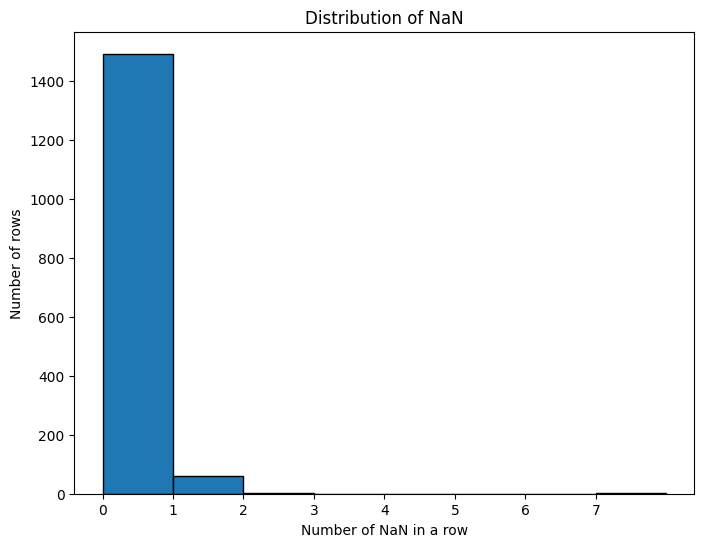

In [11]:
# Nanの数の分布をヒストグラムで表示
data_copy = data.copy()
data_copy['num_nan'] = [(data_copy.iloc[k] == -200).sum() for k in range(data_copy.shape[0])]

plt.figure(figsize=(8, 6))
plt.hist(data_copy['num_nan'], bins=range(data_copy['num_nan'].max() + 2), edgecolor='black')
plt.title('Distribution of NaN')
plt.xlabel('Number of NaN in a row')
plt.ylabel('Number of rows')
plt.xticks(range(data_copy['num_nan'].max() + 1))
plt.show()

In [15]:
# NaNの数が閾値より多い場合は削除
# threshold = 6
# data = data.drop(data_copy[data_copy['num_nan'] >= threshold].index)
# print(data)

In [12]:
# 座標ごとに50件ずつ抽出してcsvファイル作成
invfp = pd.DataFrame()
for (x, y), group in data.groupby(['x', 'y']):
    if len(group) > 0:
        if len(group) >= 50:
            invfp = pd.concat([invfp, group.sample(n=50, random_state=46)], ignore_index=True)
            # timeの昇順に並び変える
            invfp = invfp.sort_values("time")
            invfp = invfp.reset_index(drop=True)

print(invfp.shape[0])
invfp.to_csv(R'C:/Users/sukegawa/Desktop/study/datasets/invfp/invfp8_1m.csv', index=False)

1350


In [13]:
# 選ばれなかったデータから10件ずつ抽出してテストデータ作成
test_invfp = pd.DataFrame()
selected_indices = set(invfp.index)

for (x, y), group in data.groupby(['x', 'y']):
    remaining = group[~group.index.isin(selected_indices)]
    if len(remaining) > 0:
        if len(remaining) >= 10:
            test_invfp = pd.concat([test_invfp, remaining.sample(n=10, random_state=46)], ignore_index=True)
        else:
            test_invfp = pd.concat([test_invfp, remaining], ignore_index=True)
        # timeの昇順に並び変える
        test_invfp = test_invfp.sort_values("time")
        test_invfp = test_invfp.reset_index(drop=True)

print(test_invfp.shape[0])
test_invfp.to_csv(R'C:/Users/sukegawa/Desktop/study/datasets/invfp/invfp8_1m_test.csv', index=False)

49
